<a href="https://colab.research.google.com/github/nadinibzrra/AnaliseExploratoria/blob/main/AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE EXPLORATÓRIA**



---



Dataset utilizado na tarefa avaliativa 3.

Análise Exploratória dos Dados coletados do dataset. 

Fonte utilizada: https://www.kaggle.com/datasets

Dataset usado: https://www.kaggle.com/shivamb/netflix-shows

- Análise exploratória
- Entender cada coluna do dataset
- Coluna numérica, coluna categórica
- Gráficos de exploração visual
 

Componentes: 


*   Clara Nadini
*   Euclides Neto



Link para o dataset no git: https://github.com/EuNetu/DataSetNetflix/blob/main/netflix_titles.csv

Link para versão não processada: https://raw.githubusercontent.com/EuNetu/DataSetNetflix/main/netflix_titles.csv

OBS.: Não pode ser visualizado no github por se tratar de um dataset muito grande.

A análise feita nesse trabalho tem como objetivo observar os dados brutos das colunas. Com a finalidade de enteder os tipos de dados e amostras coletadas do dataset. Mostrando o número de dados nulos, descrição estatística, gráfico de pizza, histogramas, boxplot, gráfico de dispersão e nuvem de palavras. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Dataframe
dfPrincipal = pd.read_csv('https://raw.githubusercontent.com/EuNetu/DataSetNetflix/main/netflix_titles.csv')

In [ ]:
#Print do df principal
#dfPrincipal

In [ ]:
#Mostra quantidade de amostras
qtdAmostras = dfPrincipal.shape[0]

#Mostra quantidade de colunas
qtdColunas = dfPrincipal.shape[1]

#Mostra os nomes das colunas
nomesColunas = dfPrincipal.columns.values
print("Quantidade de Amostras: ")
print(qtdAmostras)
print("\nQuantidade de Colunas: ")
print(qtdColunas)
print("\nNomes das Culunas no Dataset")
print(nomesColunas)

Quantidade de Amostras: 
8807

Quantidade de Colunas: 
12

Nomes das Culunas no Dataset
['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'release_year' 'rating' 'duration' 'listed_in' 'description']


In [ ]:
#Mostra tipo de dados das colunas 
dfPrincipal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Verifica quantas amostras possuem valor NaN por coluna
dfPrincipal.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Mostra as amostras onde a coluna rating(faixa etária) é NaN
#Seleção condicional
#Mostra as linhas do df onde os isna retornou TRUE
dfPrincipal[dfPrincipal['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
#Mostra apenas os titulos que rating(faixa etária) é NaN
#dfPrincipal[dfPrincipal['rating'].isna()].title

#Lista de colunas específicas onde rating(faixa etária) é NaN
#Titulo, país e ano de lançameto 
dfPrincipal[dfPrincipal['rating'].isna()][['title','country','release_year']]

,title,country,release_year
5989,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,2017
6827,Gargantia on the Verdurous Planet,Japan,2013
7312,Little Lunch,Australia,2015
7537,My Honor Was Loyalty,Italy,2015




---


**Descrição Estatística**

In [ ]:
#Colunas numéricas
#Neste df a única coluna numérica é o release_year(ano de lançamento)

#25% dos filmes e séries foram lançados até 2013, 50% foram lançados até 2017 (mediana), 
#e 75% dos filmes e séries foram lançados até 2019, sendo que o ano máximo de lançamento é 2021 
dfPrincipal.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


count: número de observações não nulas

mean: média dos valores

std: desvio padrão

max: valor máximo

min: valor mínimo

In [ ]:
#Colunas categóricas
dfPrincipal.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


unique: quantidade de valores únicos

top: valor mais comum

freq: frequência do valor mais comum


---



In [ ]:
#mostra os valores únicos que aparecem em release_year(ano de lançamento)
dfPrincipal['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
#Conta quantas amostras em cada valor
dfPrincipal['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

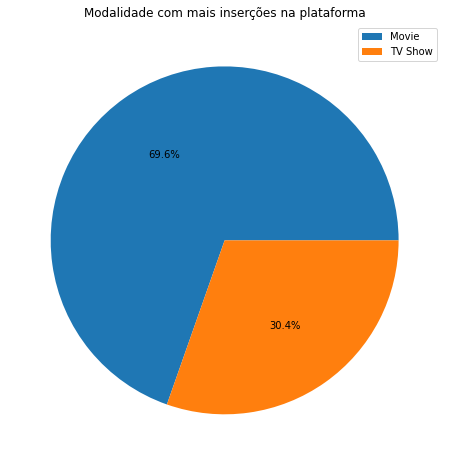

In [ ]:
#Gráfico de pizza
#Porcentagem de filmes e seriados inseridos no streaming
dados = dfPrincipal['type'].value_counts()
legenda = dados.index

fig, ax = plt.subplots(figsize = (8,8)) 
ax = plt.pie(dados, autopct='%1.1f%%')
plt.title('Modalidade com mais inserções na plataforma')
plt.legend(legenda,loc= 'upper right')
plt.show()
#Gráfico 1

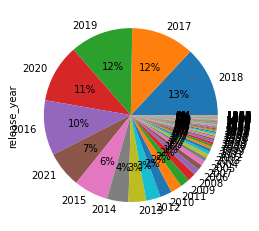

In [ ]:
#Gráfico de pizza
#Mede a frequência dos lançamentos de filmes e series de acordo com os anos
dfPrincipal['release_year'].value_counts().plot.pie(autopct='%.0f%%')
#Gráfico 2

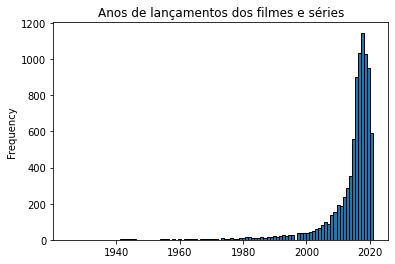

In [ ]:
#Histograma
#Mede a frequência dos lançamentos de filmes e series de acordo com os anos
dfPrincipal['release_year'].plot.hist(title='Anos de lançamentos dos filmes e séries', edgecolor='black', bins = 100)
#Gráfico 3

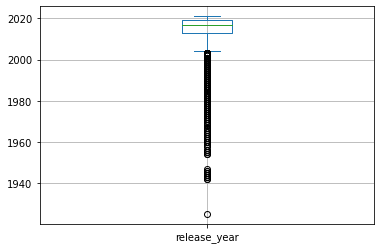

In [ ]:
#Boxplot: Detecção de Outliers
dfPrincipal['release_year'].plot.box(grid = True)
#Gráfico 4

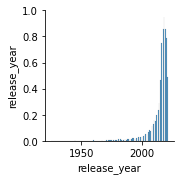

In [ ]:
#Gráfico de dispersão
#Nesse dataset apenas possui uma coluna numérica, release_year(ano de lançamento)
#Impossibilitando de perceber a relação entre colunas numéricas
sb.pairplot(data=dfPrincipal[['release_year']])
#Gráfico 5

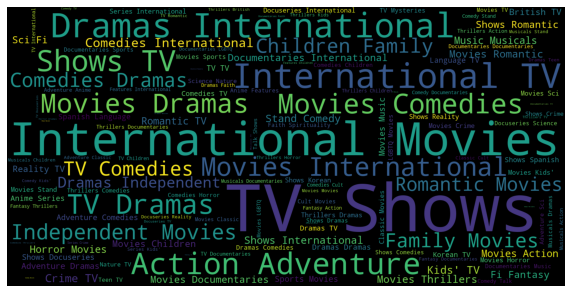

In [ ]:
from wordcloud import WordCloud, STOPWORDS
genero = ' '.join(dfPrincipal['listed_in'].dropna())

#Gerando uma wordcloud dos genêros dos filmes e series
wordcloudAutores = WordCloud(background_color="black", width=1600, height=800).generate(genero)

# Plotando a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off()
plt.imshow(wordcloudAutores);
#Nuvem de palvras 1

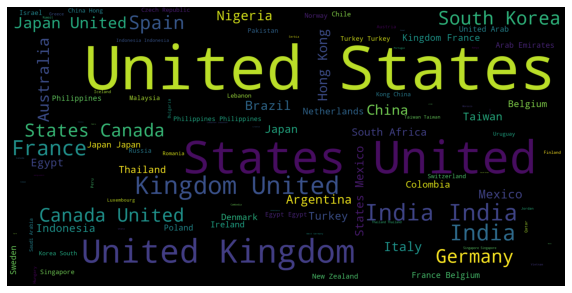

In [ ]:
from wordcloud import WordCloud, STOPWORDS
paises = ' '.join(dfPrincipal['country'].dropna())

#Gerando uma wordcloud dos genêros dos filmes e series
wordcloudAutores = WordCloud(background_color="black", width=1600, height=800).generate(paises)

#Plotando a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off()
plt.imshow(wordcloudAutores);
#Nuvem de palvras 2

# Conclusão

Com essa base de dados como referência, podemos perceber, que o número de programas Americanos inseridos na plataforma, ultrapassa os de qualquer outro país, tendo o Reino Unido como o segundo país com programas mais inseridos. Podemos ter essa visualização na nuvem de palavras 2.

Como visto no gráfico 1 e 2, temos que o tipo de programa mais inseridos são os filmes e que os programas de 2018 são os mais inseridos na plataforma. E com o gráfico 3 e 4, podemos visualizar a proporção dos anos dos fimes mais inseridos. Que temos como top 5, em ordem decrescente 2018, 2017, 2019, 2020 e 2016.

Outra informação, que temos é que de todos os programas inseridos, teve muito mais filmes de Show de tv; ficando a frente de gêneros como, filmes internacionais e dramas, que são gêneros bem populares, Podemos ter essa visualização na nuvem de palavras 2.